<h1 style="text-align: center;">Métodos Numéricos</h1>

<h3 style="text-align: left; color: red;">Conceptos clave</h3>

- Modelar: Describir un problema o abstraer sus carácterísticas intrínsecas.
- Simular: Experimentar mediante los datos o características obtenidas de la abstracción.
- Emular: Imitar escenarios.

<h3 style="text-align: left; color: red;">Métodos Analíticos</h3>

Referencia al manejo de grandes datos, donde la solución es exacta.

In [5]:
# Resolver ecuación
def resolver_ecuacion (x):
    # Ecuación: x^2+x-1
    resultado = x**2 + x - 1
    print(f"El valor de x cuando toma el valor de {x} es: {resultado}")
    return None

x = float(input("Ingrese el valor de x: "))
resolver_ecuacion(x)

El valor de x cuando toma el valor de 3.0 es: 11.0


<h3 style="text-align: left; color: red;">Métodos Numéricos</h3>

Proporciona soluciones aproximadas, con error. Es decir, sin solución exacta.

In [7]:

# Obtener valores de x
x = -2
while x <= 2:
    resultado = x**2 + x - 1
    if abs(resultado) < 0.1: 
        print(f"Aproximación: x = {x}, f(x) = {resultado}")
    x += 0.1


Aproximación: x = -1.5999999999999996, f(x) = -0.040000000000000924
Aproximación: x = 0.6000000000000006, f(x) = -0.03999999999999859


<h3 style="text-align: left; color: red;">Precisión vs Exactitud</h3>

- Exactitud: Nos dice que tan cerca del valor real se encuentran los resultados.
- Precision: Nos dice que tan cerca están los resultados entre sí, sin importar si se acercan al valor real.

In [12]:
# Codigo para apreciar la diferencia
valor_real = 10

# Conjuntos de valores para evidenciar la diferencia
preciso_no_exacto = [15.1, 15.2, 15.0, 15.1, 15.2] # Mas preciso
exacto_no_preciso = [9.0, 11.0, 10.5, 8.5, 11.5] # Mas exacto
preciso_y_exacto = [10.1, 10.0, 9.9, 10.0, 10.1] # Los dos

# Función para calcular promedio y error
def analizar(mediciones, nombre):
    promedio = sum(mediciones) / len(mediciones)
    error = abs(promedio - valor_real)
    print(f"{nombre}:")
    print(f"Promedio = {promedio}")
    print(f"Error = {error}")
    print()

analizar(preciso_no_exacto, "Preciso pero no exacto")
analizar(exacto_no_preciso, "Exacto pero no preciso")
analizar(preciso_y_exacto, "Preciso y exacto")


Preciso pero no exacto:
Promedio = 15.12
Error = 5.119999999999999

Exacto pero no preciso:
Promedio = 10.1
Error = 0.09999999999999964

Preciso y exacto:
Promedio = 10.02
Error = 0.019999999999999574



<h3 style="text-align: left; color: red;">Tipos de errores</h3>

- Error de corte/truncamiento: Se toman los digitos sin redondear, por corte como lo dice el nombre.
- Error de redondeo: Se redondean los dígitos.

In [17]:
# Error de corte
x = 2 * 1.41251231235
print(f"Valor de x por corte/truncamiento: {x:.5f}")

# Error de redondeo
x_redondeado = int(x * 100000 + 0.7) / 100000
print(f"Valor de x por redondeo: {x_redondeado}")

Valor de x por corte/truncamiento: 2.82502
Valor de x por redondeo: 2.82503


<h3 style="text-align: left; color: red;">Representación Numérica</h3>

Es el como una computadora almacena y maneja los números utilizando bits, mediante el estándar IEEE 754 de doble o simple precisión.

In [19]:
def estandar_754_precision_simple(signo,exponente,mantisa):
    # Para el exponente
    e = 127
    exponente_sesgado = exponente - e
    # Para la mantisa
    m = mantisa + 1

    resultado = ((-1) ** signo) * (2 ** exponente_sesgado) * m

    print(f"El numero es: {resultado}")
    return None

signo = 1
exponente = 131
mantisa = 0.185
estandar_754_precision_simple(1,131,0.185)

El numero es: -18.96


<h3 style="text-align: left; color: red;">Cálculo de errores</h3>

Error real:

$$error_{real}~=~p - p^*$$

Error absoluto:

$$error_{abs}~=~|error_{real}|$$

Error relativo:

$$error_{rel}~=~|\frac{error_{abs}}{p}|$$

Error relativo porcentual:

$$error_{\%}~=~error_{rel}*100\%$$

In [37]:
import math

def error_real(p,p_aprox):
    error_real = p - p_aprox
    print(f"Error real: {error_real}")
    return None

def error_absoluto(p,p_aprox):
    error_abs = abs(p-p_aprox)
    print(f"Error absoluto: {error_abs}")
    return None

def error_relativo(p,p_aprox):
    error_rel = abs((p-p_aprox)/p)
    print(f"Error relativo: {error_rel}")
    return None

def error_relativo_porcentual(p,p_aprox):
    error_porc = (abs((p-p_aprox)/p)) * 100
    print(f"Error relativo porcentual: {error_porc}%")
    return None

p = math.e
p_aprox = 3

error_real(p,p_aprox)
error_absoluto(p,p_aprox)
error_relativo(p,p_aprox)
error_relativo_porcentual(p,p_aprox)

Error real: -0.2817181715409549
Error absoluto: 0.2817181715409549
Error relativo: 0.10363832351432703
Error relativo porcentual: 10.363832351432704%


<h3 style="text-align: left; color: red;">Representación Numérica IEEE 754</h3>

Pasos para convertir un número decimal a este estándar:
1. Convertir a binario (parte entera y decimal).
2. Escribir en notación científica el número obtenido.
3. Seguir el estándar IEEE 754 de 32 o 64 bits.

Seguiremos el ejemplo con el número $263.3_{10}$

In [6]:
def entero_a_binario(parte_entera):
    bit_parte_entera = ""
    if parte_entera == 0:
        bit_parte_entera = "0"
    else:
        while parte_entera > 0:
            residuo = parte_entera % 2
            bit_parte_entera = str(residuo) + bit_parte_entera
            parte_entera = int(parte_entera / 2)
        return bit_parte_entera

def fraccionario_a_binario(parte_fraccionaria):
    bit_parte_fraccionaria = ""
    conteo = 0
    limite_cifras = 6
    while parte_fraccionaria > 0 and conteo < limite_cifras:
        parte_fraccionaria = parte_fraccionaria * 2
        aux = int(parte_fraccionaria)
        bit_parte_fraccionaria = bit_parte_fraccionaria + str(aux)
        parte_fraccionaria -= aux
        conteo += 1
    return bit_parte_fraccionaria

def signo(valor):
    if valor < 0:
        return "1"
    else:
        return "0"

def exponente_binario(parte_entera, parte_fraccionaria):
    if parte_entera != 0:
        exponente = len(entero_a_binario(abs(parte_entera))) - 1
    else:
        exponente = -1
        while parte_fraccionaria * 2 < 1:
            parte_fraccionaria *= 2
            exponente -= 1
    exponente_sesgado = exponente + 127  
    return entero_a_binario(exponente_sesgado).zfill(8)

def obtener_mantisa(parte_entera, parte_fraccionaria):
    if parte_entera != 0:
        bin_entera = entero_a_binario(abs(parte_entera))
        bin_fraccion = fraccionario_a_binario(parte_fraccionaria)
        mantisa = bin_entera[1:] + bin_fraccion
    else:
        mantisa = ""
        parte_fraccionaria = abs(parte_fraccionaria)
        while parte_fraccionaria * 2 < 1:
            parte_fraccionaria *= 2
        parte_fraccionaria *= 2
        mantisa += "1" 
        mantisa += fraccionario_a_binario(parte_fraccionaria - 1)
    return (mantisa + "00000000000000000000000")[:23]  

def convertir_a_ieee754(numero):
    s = signo(numero)
    parte_entera = int(abs(numero))
    parte_fraccionaria = abs(numero) - parte_entera
    e = exponente_binario(parte_entera, parte_fraccionaria)
    m = obtener_mantisa(parte_entera, parte_fraccionaria)
    ieee754 = s + " " + e + " " + m
    print(f"Signo:{s}")
    print(f"Exponente:{e}")
    print(f"Mantisa:{m}")
    print(f"IEEE-754 de 32 bits:{ieee754}")
    return None

convertir_a_ieee754(263.3)

Signo:0
Exponente:10000111
Mantisa:00000111010011000000000
IEEE-754 de 32 bits:0 10000111 00000111010011000000000


In [1]:
def entero_a_binario(parte_entera):
    bit_parte_entera = ""
    if parte_entera == 0:
        bit_parte_entera = "0"
    else:
        while parte_entera > 0:
            residuo = parte_entera % 2
            bit_parte_entera = str(residuo) + bit_parte_entera
            parte_entera = int(parte_entera / 2)
    return bit_parte_entera

def fraccionario_a_binario(parte_fraccionaria, limite_cifras):
    bit_parte_fraccionaria = ""
    conteo = 0
    while parte_fraccionaria > 0 and conteo < limite_cifras:
        parte_fraccionaria = parte_fraccionaria * 2
        aux = int(parte_fraccionaria)
        bit_parte_fraccionaria = bit_parte_fraccionaria + str(aux)
        parte_fraccionaria -= aux
        conteo += 1
    return bit_parte_fraccionaria

def signo(valor):
    if valor < 0:
        return "1"
    else:
        return "0"

def exponente_binario_64(parte_entera, parte_fraccionaria):
    if parte_entera != 0:
        exponente = len(entero_a_binario(abs(parte_entera))) - 1
    else:
        exponente = -1
        while parte_fraccionaria * 2 < 1:
            parte_fraccionaria *= 2
            exponente -= 1
    exponente_sesgado = exponente + 1023  # bias para 64 bits
    return entero_a_binario(exponente_sesgado).zfill(11)

def obtener_mantisa_64(parte_entera, parte_fraccionaria):
    if parte_entera != 0:
        bin_entera = entero_a_binario(abs(parte_entera))
        bin_fraccion = fraccionario_a_binario(parte_fraccionaria, 52)
        mantisa = bin_entera[1:] + bin_fraccion
    else:
        mantisa = ""
        parte_fraccionaria = abs(parte_fraccionaria)
        while parte_fraccionaria * 2 < 1:
            parte_fraccionaria *= 2
        parte_fraccionaria *= 2
        mantisa += "1"
        mantisa += fraccionario_a_binario(parte_fraccionaria - 1, 52)
    return (mantisa + "0000000000000000000000000000000000000000000000000000")[:52]

def convertir_a_ieee754_64(numero):
    s = signo(numero)
    parte_entera = int(abs(numero))
    parte_fraccionaria = abs(numero) - parte_entera
    e = exponente_binario_64(parte_entera, parte_fraccionaria)
    m = obtener_mantisa_64(parte_entera, parte_fraccionaria)
    ieee754 = s + " " + e + " " + m
    print(f"Signo:{s}")
    print(f"Exponente:{e}")
    print(f"Mantisa:{m}")
    print(f"IEEE-754 de 64 bits:{ieee754}")
    return None

convertir_a_ieee754_64(263.3)

Signo:0
Exponente:10000000111
Mantisa:0000011101001100110011001100110011001100110011001101
IEEE-754 de 64 bits:0 10000000111 0000011101001100110011001100110011001100110011001101


<h3 style="text-align: left; color: red;">Aritmética de Computador</h3>

Hace referencia a la representación en punto flotante y sus operaciones definidas, mostradas a continuación:

In [7]:
def numero_a_flotante(digito):
    if digito == 0:
        numero = 0.0
        return numero
    else:
        while abs(digito) >= 1:
            digito /= 10
        return digito

def suma_flotante(digitoA, digitoB):
    resultado = digitoA + digitoB
    return numero_a_flotante(resultado)

def resta_flotante(digitoA, digitoB):
    resultado = digitoA - digitoB
    return numero_a_flotante(resultado)

def multiplicacion_flotante(digitoA, digitoB):
    resultado = digitoA * digitoB
    return numero_a_flotante(resultado)

def division_flotante(digitoA, digitoB):
    if digitoB == 0:
        print("No existe la division para 0.")
        return None
    else:
        resultado = digitoA / digitoB
        return numero_a_flotante(resultado)
    
def error_relativo_porcentual(valorReal, valorAprox):
    if valorReal == 0:
        print("No se puede calcular.")
        return None 
    error = abs((valorReal - valorAprox)/(valorReal)) * 100
    return error

# Ejemplos
digitoA = 0.71429
digitoA_real = 5/7
digitoA_flotante = numero_a_flotante(digitoA)
digitoB = 0.71425
digitoB_real = 0.714251
digitoB_flotante = numero_a_flotante(digitoB)

multiplicacionAprox = multiplicacion_flotante(digitoA_flotante, digitoB_flotante)
multiplicacionReal  = digitoA_real * digitoB_real

print(f"Las operaciones de los siguientes numeros: A = {digitoA_flotante} y B = {digitoB_flotante}")
print(f"Suma Flotante: {suma_flotante(digitoA_flotante,digitoB_flotante)}")
print(f"Resta Flotante: {resta_flotante(digitoA_flotante,digitoB_flotante)}")
print(f"Multiplicacion Flotante: {multiplicacion_flotante(digitoA_flotante,digitoB_flotante)}")
print(f"Division Flotante: {division_flotante(digitoA_flotante,digitoB_flotante)}")
print(f"Error relativo % de la multiplicacion: {error_relativo_porcentual(multiplicacionReal,multiplicacionAprox)} %")

Las operaciones de los siguientes numeros: A = 0.71429 y B = 0.71425
Suma Flotante: 0.14285399999999998
Resta Flotante: 3.999999999992898e-05
Multiplicacion Flotante: 0.5101816325
Division Flotante: 0.100005600280014
Error relativo % de la multiplicacion: 0.00045999235563390015 %


<h3 style="text-align: left; color: red;">Convergencia, Divergencia y Tolerancia</h3>

- Convergencia: Cuando al aumentar las iteraciones, el valor se acerca hacia un valor puntual.
- Divergencia: Cuando al aumentar las iteraciones, el valor se aleja de forma indefinida o inestable.
<!-- - Tolerancia: Límite aceptable del error al momento de establecer criterios de parada. -->

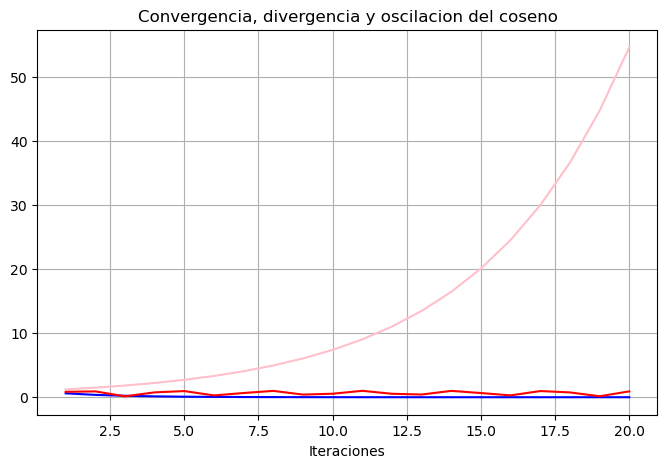

In [18]:
import matplotlib.pyplot as plot
import numpy as np

iteraciones = np.linspace(1,20,20)

def convergencia(x):
    return np.exp(-0.5*x)

def divergencia(x):
    return np.exp(0.2*x)

def oscilacion(x):
    return np.abs(np.sin(x))

yConv = convergencia(iteraciones)
yDiv  = divergencia(iteraciones)
yOs   = oscilacion(iteraciones)

plot.figure(figsize=(8,5))
plot.plot(iteraciones,yConv,color="blue",label="Convergencia")
plot.plot(iteraciones,yDiv,color="pink",label="Divergencia")
plot.plot(iteraciones,yOs,color="red",label="Osilacion")
plot.xlabel("Iteraciones")
plot.title("Convergencia, divergencia y oscilacion del coseno")
plot.grid(True)
